In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import model_selection
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
ICO = pd.read_csv("/Users/GeoffroyDeMeyer/Desktop/Dathena/Projet/Dathena Network/CSV/ICO_finale_f.csv")


In [3]:
ICO_x = ICO[['integrity', 'team', 'vision', 'product', 'marketing', 'community', 'risk', 'youtube channel', 'global variation', 'currency variation sum',
             'liquidity', 'liquidity max', 'liquidity min', 'ICO video', 'video count', 'view count', 'subscriber count', 
                    'critic video', 'website', 'whitepaper', 'facebook', 'twitter', 'follower', 'following', 
                    'total tweet', 'ICO tweet', 'linkedin', 'reddit', 'github', 'github repositories', 
                    'github repositories frequency', 'github commit', 
                    'medium', 'bitcointalk', 'steemit', 'event']].copy()
ICO_y = ICO[["success"]]

seed = 1

X_train, X_test, y_train, y_test = model_selection.train_test_split(ICO_x, ICO_y, train_size=0.8, random_state=seed)

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)


# Fixer les valeurs des hyperparamètres à tester
param_grid = {'max_depth':[k for k in range (6,10)], 'n_estimators':[k for k in range(40,60,2)]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(RandomForestClassifier(),
param_grid, 
cv=5, # nombre de folds de validation croisée
scoring=score # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
# clf.fit(X_train, y_train)
clf.fit(X_train_std, y_train.values.ravel())

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:",)
print(clf.best_params_)

print("Accuracy: %.2f%%" % (clf.score(X_test_std, y_test) *100))

# Afficher les performances correspondantes
#print("Résultats de la validation croisée :")
#for mean, std, params in zip(clf.cv_results_['mean_test_score'], # score moyen 
 #                            clf.cv_results_['std_test_score'], # écart-type du score
 #   clf.cv_results_['params'] # valeur de l'hyperparamètre
#):
#    print("\t%s = %0.3f (+/-%0.03f) for %r" % (score, # critère utilisé
#    mean, # score moyen
#    std * 2, # barre d'erreur
#    params # hyperparamètre
#    ))
    



for name, importance in sorted(list(zip(ICO_x.columns, clf.best_estimator_.feature_importances_)), key=lambda tup: -tup[1]):
   print(name, importance)

/anaconda3/envs/Dathena/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'max_depth': 6, 'n_estimators': 42}
Accuracy: 77.66%
liquidity max 0.1043466166783874
liquidity min 0.09540337365199356
ICO tweet 0.08581930775892567
follower 0.08443184507155278
liquidity 0.07234364723635353
currency variation sum 0.06735604792348235
critic video 0.061566092705462885
subscriber count 0.0519659282805406
total tweet 0.04668361451439926
following 0.038847635502303315
view count 0.02772830373392317
video count 0.02743752682982486
team 0.027024524404610988
github repositories frequency 0.025663234624047775
event 0.02290209606337283
product 0.021279942843874484
vision 0.019775812398028034
github repositories 0.01727948474303521
bitcointalk 0.015696719558044497
integrity 0.012691430028749041
global variation 0.011469761360683882
github commit 0.009573449215700268
linkedin 0.008009158992721383
facebook 0.007848737399935229
medium 0.007571659416703678
github 0.00565692660307535
reddit 0.005331372855635839
community 0.00

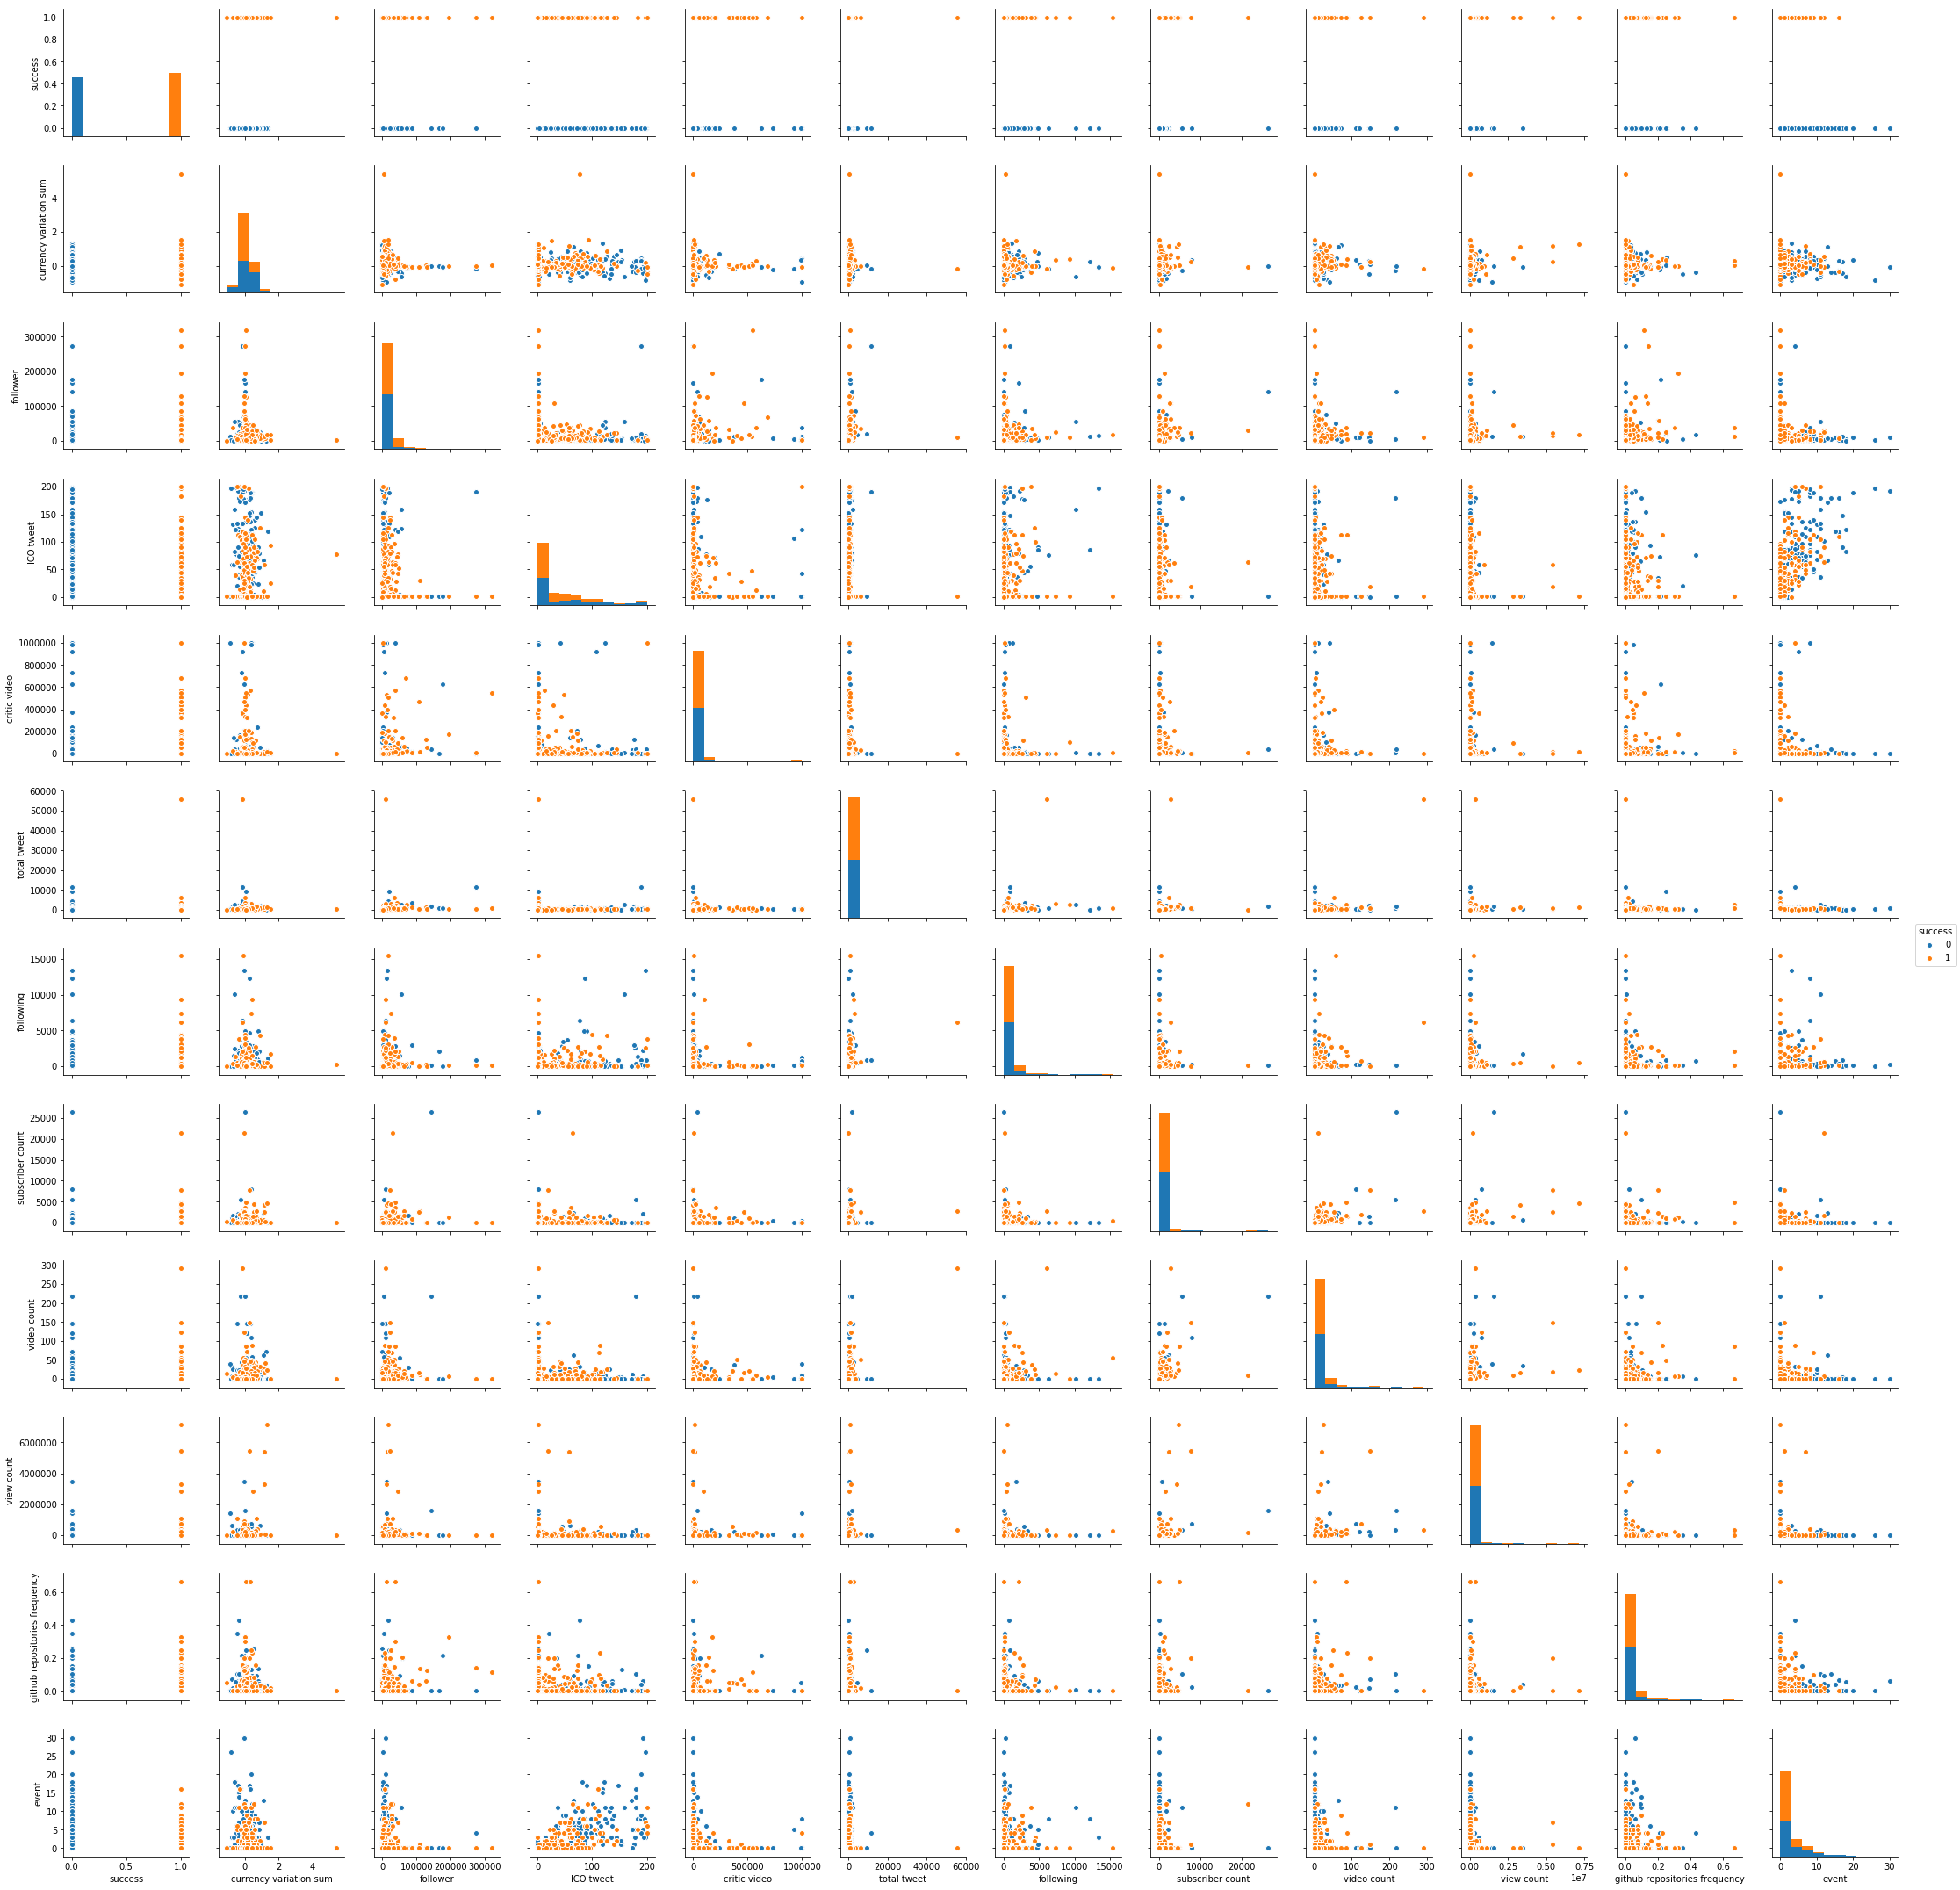

In [26]:
data = ICO[['success','currency variation sum', 'follower', 'ICO tweet', 'critic video', 'total tweet', 'following', 'subscriber count', 'video count', 
             'view count', 'github repositories frequency', 'event' ]]

figure = sns.pairplot(data, hue='success', size=2.5)
figure.savefig('RandomForestClassifier.png')